In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 500
X = 2 * np.random.rand(500,1) # 0과 1 사이의 데이터가 500x1로 만들어짐
y = 4 + 3*X + np.random.randn(500,1) # 평균이 0이고 표준편차가 1인 데이터가 500x1로 만들어짐

In [2]:
print(X.shape)
print(y.shape)
print(max(X))
print(min(X))
print(max(y))
print(min(y))

(500, 1)
(500, 1)
[1.99909275]
[0.00815745]
[11.74205964]
[2.05247895]


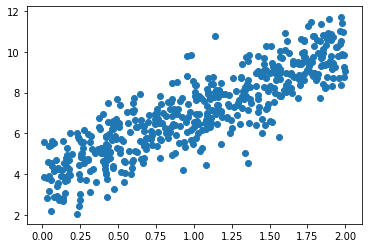

In [3]:
plt.scatter(X,y) # scatter로 data display

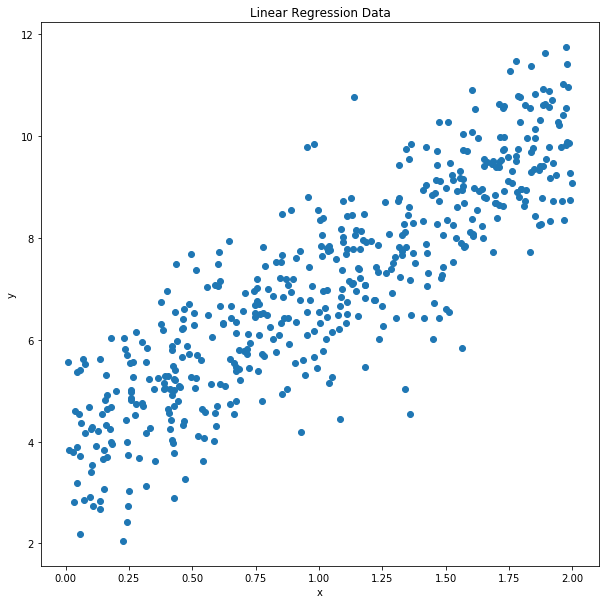

In [4]:
plt.figure(figsize=(10,10)) # figure size 정할 수 있음
plt.scatter(X,y) # scatter로 data display
plt.title("Linear Regression Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Theta and X [X0,X1]

In [5]:
theta1 = 3 # theta1은 기울기
theta0 = 4 # theta0은 접점
# np.array를 vector 말고 matrix로 만들어준다.(vector는 transpose가 안되니까)
theta = np.array([[theta1, theta0]]).T
print(theta)

[[3]
 [4]]


In [6]:
X.shape

(500, 1)

In [7]:
# 500x1을 1로 채운다. (여기서는 N이 500이니까)
oneColumns = np.full((N,1),1)
print(oneColumns.shape)
# 옆으로 붙이는 게 np.column_stack이다. (row_stack도 있음)
# column_stack으로 X에 column을 하나 추가한다.
# 그래서 500x2가 된다.
X1 = np.column_stack((X,oneColumns))
print(X1.shape)
print(X1[:10,:])

(500, 1)
(500, 2)
[[1.47951991 1.        ]
 [1.01601134 1.        ]
 [0.74716506 1.        ]
 [0.86208325 1.        ]
 [0.4280829  1.        ]
 [1.60538924 1.        ]
 [0.9509045  1.        ]
 [0.84490773 1.        ]
 [1.90815696 1.        ]
 [1.51728738 1.        ]]


predictions = X1 x Theta  
X1.shape = (500,2), Theta.shape = (2,1)이므로 predictions는 (500,1)  
500개의 X에 대한 prediction

In [8]:
predictions = np.matmul(X1, theta)
# predictions는 500x1 matrix가 된다.
predictions.shape

(500, 1)

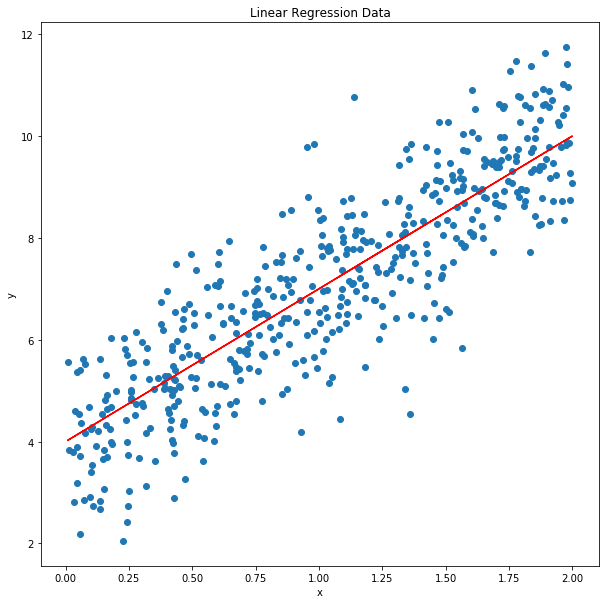

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.plot(X, predictions, color = "red") # 직선을 찍을 때는 plot
plt.title("Linear Regression Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Cost 계산
<img src="cost.jpg">

In [10]:
a = np.array([[1], [2], [3]])
b = np.array([[2], [4], [1]])
c = a - b
print(a)
print(b)
print(c)
d = np.square(c) # 제곱
print(d)
print(np.sum(d)) # 제곱의 합

[[1]
 [2]
 [3]]
[[2]
 [4]
 [1]]
[[-1]
 [-2]
 [ 2]]
[[1]
 [4]
 [4]]
9


In [11]:
print(X1.shape) # 500 x 2
print(X1.shape[0])
print(y.shape)
print(predictions.shape)

(500, 2)
500
(500, 1)
(500, 1)


In [12]:
def cost(X, y, theta):
    m = X.shape[0]
    predictions = np.matmul(X,theta)
    diff = predictions - y
    cost = (1 / 2*m) * np.sum(np.square(diff))
    return cost

In [13]:
print(cost(X1,y,theta)) # 현재 x값, 실제 y값

129381.63591285136


# Theta update
<img src = "theta.jpg">

In [14]:
x = np.array([[10,1], [12,1], [20,1]])
error = ([[-1], [1], [2]])
print(x)
print(error)
print(x.T)
# x를 transpose해서 error와 곱해준다.
delta = np.matmul(x.T, error)
print(delta)

[[10  1]
 [12  1]
 [20  1]]
[[-1], [1], [2]]
[[10 12 20]
 [ 1  1  1]]
[[42]
 [ 2]]


In [15]:
a = np.array([[10], [20]])
print(a)
b = np.array([[42], [2]])
c = a - 0.4*b
print(c)

[[10]
 [20]]
[[-6.8]
 [19.2]]


# Update Code
<img src = "regression.jpg">

In [16]:
def linear_regression(X, theta, y, alpha):
    m = X.shape[0]
    num_iterations = 100 # 학습을 100번 하겠다.
    costs = []
    thetas = [theta] # 초기 theta값
    for i in range(num_iterations):
        predictions = np.matmul(X1, theta)
        errors = predictions - y
        delta = np.matmul(X.T, errors)
        
        theta = theta - (alpha/m)*delta
        cost1 = cost(X,y,theta)
        costs.append(cost1)
        thetas.append(theta)
    return costs, thetas

In [17]:
costs, thetas = linear_regression(X1, theta, y, 0.5)

In [18]:
print(len(costs), len(thetas))
# 100번 iteration 했으니까 costs의 length는 100
# 초기 theta값이 있는 상태에서 iteration 했으니까 thatas의 length는 101

100 101


# Plot costs

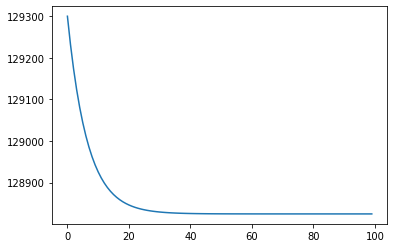

In [19]:
plt.plot(costs)

cost를 plotting하면 iteration 후 cost가 내려갔음을 증명할 수 있다.  
: linear regression 성공  
그림을 보면, 20번 이상 iteration 해도 크게 성능이 나아지지 않았다.  
어느 정도에서 멈춰야 할지 알 수 있다.  

# Initial and final regression

In [20]:
initialTheta = thetas[0] # 초기 theta
print(initialTheta)
finalTheta = thetas[-1] # 학습이 끝난 뒤의 theta
print(finalTheta)
prediction1 = np.matmul(X1, initialTheta)
prediction2 = np.matmul(X1, finalTheta)

[[3]
 [4]]
[[3.11249237]
 [3.86924453]]


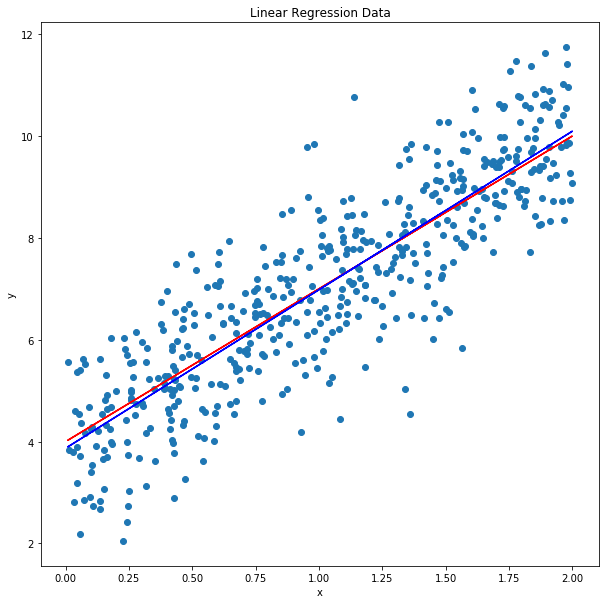

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.plot(X, prediction1, color="red")
plt.plot(X, prediction2, color="blue")
plt.title("Linear Regression Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()